## Random Forest Classifier
- Random Forest is an ensemble method, which means it combines the predictions from multiple machine learning models (Decision tree models) to make a more accurate and robust prediction.
- The base learners in a Random Forest are decision trees.
- Random Forest builds multiple decision trees by training each tree on a random subset of the training data (with replacement). This process is known as bagging, and it helps reduce overfitting.

## Approach
#### These steps outline the process to be followed when working on a predictive model: 
- Problem Definition
- Data Collection
- Data Preprocessing
- Feature Selection/Engineering
- Data Splitting
- Model Selection
- Model Training
- Prediction
- Hyperparameter Tuning
- Model Evaluation



## Problem Definition

### *Clearly state the problem you want to solve, as well as the outcome you want to predict.*


Here we are going to predict the digit using the image of the digit.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Collection

### *Gather relevant data that will be used to train and test the prediction model.*


In [2]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

## Data Preprocessing


### *Clean the data by handling missing values, dealing with outliers, data visualization, normalizing features, and encoding categorical variables.*


In [8]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

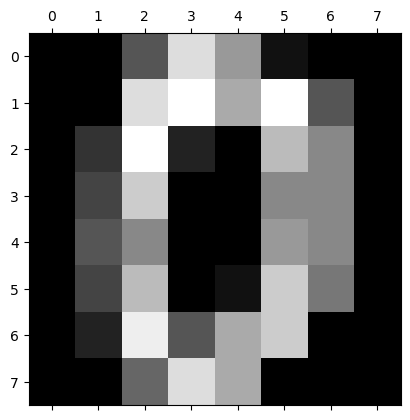

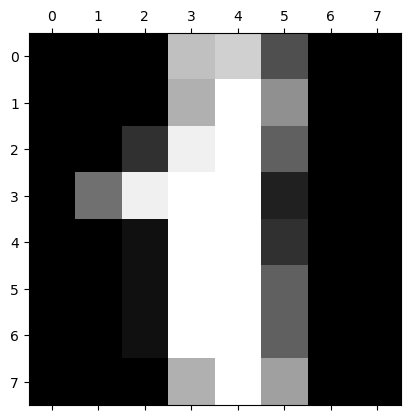

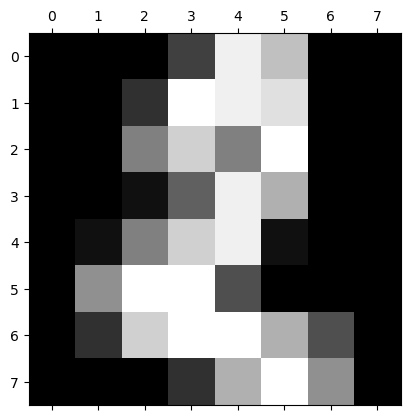

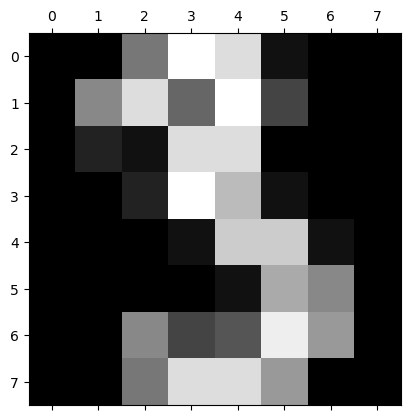

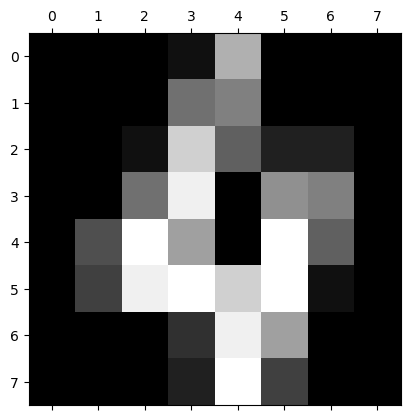

In [12]:
for i in range(5):
    plt.gray()
    plt.matshow(digits.images[i])

## Feature Selection/Engineering

### *Identify which features are important for the prediction task and create new features if needed.*


In [13]:
# Exploring data
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
df['target'] = digits.target

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
X = df.drop('target' , axis = 'columns')
y = df.target

## Data Splitting

### *Divide the datasets into a training set and a testing set to evaluate your model's performance.*

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Model Selection

### *Choose an appropriate machine learning algorithm based on the type of problem (classification, regression, etc.) and the characteristics of the data.*

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=20)

## Model Training

### *Use the training data to train the selected model by adjusting its parameters to minimize the prediction error.*

In [25]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

## Prediction

### *Once the model is trained and validated, it can be used to make predictions on new, unseen data.*


In [29]:
y_pred = model.predict(X_test)

## Hyperparameter Tuning

### *Fine-tune the model's hyperparameters to optimize its performance.*


No need !!!

## Model Evaluation

### *Assess the model's performance on a separate set of data not used during training to understand its predictive power and generalization capability.*



In [30]:
model.score(X_test,y_test)

0.9592592592592593

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2, 60,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  2,  1,  1,  0,  0,  0, 55]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

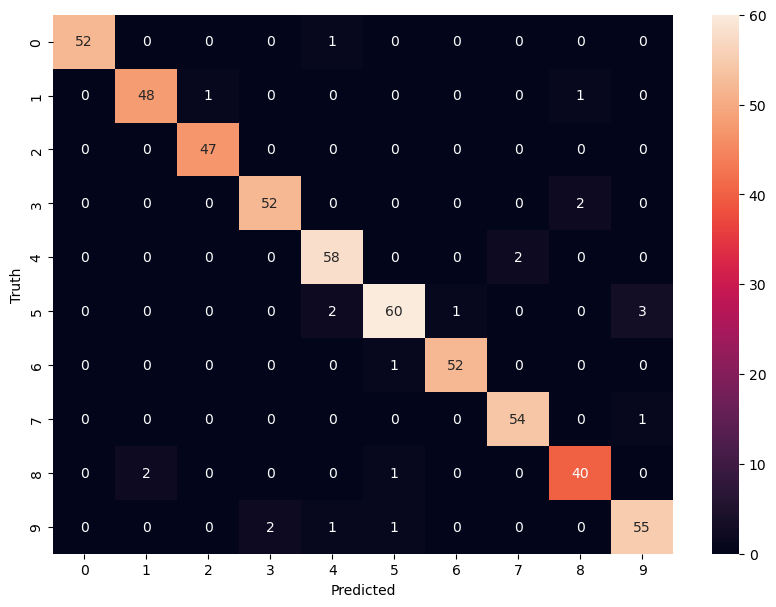

In [35]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Thank You !!!